<a href="https://colab.research.google.com/github/americofreitasjr/AnaliseSegurancaPublicaRJ/blob/master/Step_3_ISP_estudo_da_serie_historica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importando e instalando os pacotes

In [0]:
options(warn=-1)
requiredPackages = c('tidyverse','gdata','caret','plyr','rlang','digest','DataExplorer','dplyr')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) suppressMessages(suppressWarnings(install.packages(p)))
  suppressMessages(suppressWarnings(library(p,character.only = TRUE)))
}

In [4]:
options(warn=0)
load(file="df_isp.RData")
introduce(df_isp)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
5650461,23,21,2,0,0,5650461,129960603,917245296


In [28]:
summary(df_isp)

          controle            ano            MES         
 96136441-2016:     58   Min.   :2010   março  : 503669  
 14903031-2013:     56   1st Qu.:2012   janeiro: 493114  
 83131641-2015:     56   Median :2014   maio   : 491771  
 27025371-2011:     54   Mean   :2014   agosto : 488192  
 30923051-2012:     51   3rd Qu.:2016   abril  : 482851  
 07411121-2015:     51   Max.   :2018   julho  : 479682  
 (Other)      :5650135                  (Other):2711182  
                              titulo_do               total_rbft     
 Lesão corporal dolosa             : 700874   Furto        :1495237  
 Ameaça                            : 657393   não se aplica:2777018  
 Roubo a transeunte                : 621249   Roubo        :1378206  
 Lesão corporal culposa de trânsito: 353511                          
 Furto (outros)                    : 308436                          
 Roubo de veículo                  : 288474                          
 (Other)                           :2720524   

Identificando as TOP 10 DPs com maior volume de ocorrencias

In [26]:
df <- df_isp %>%
      group_by(DP) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(desc(nrow))
df.top10.DP <- head(df,10)

df.top10.DP$DP

DP,nrow
<fct>,<int>
Delegacia de Roubos e Furtos de Automóveis,195938
035a. Campo Grande,139551
059a. Duque de Caxias,137367
034a. Bangu,129095
064a. Vilar dos Teles,105822
074a. Alcantara,102949
032a. Taquara,102676
021a. Bonsucesso,89518
005a. Mem de Sá,89464


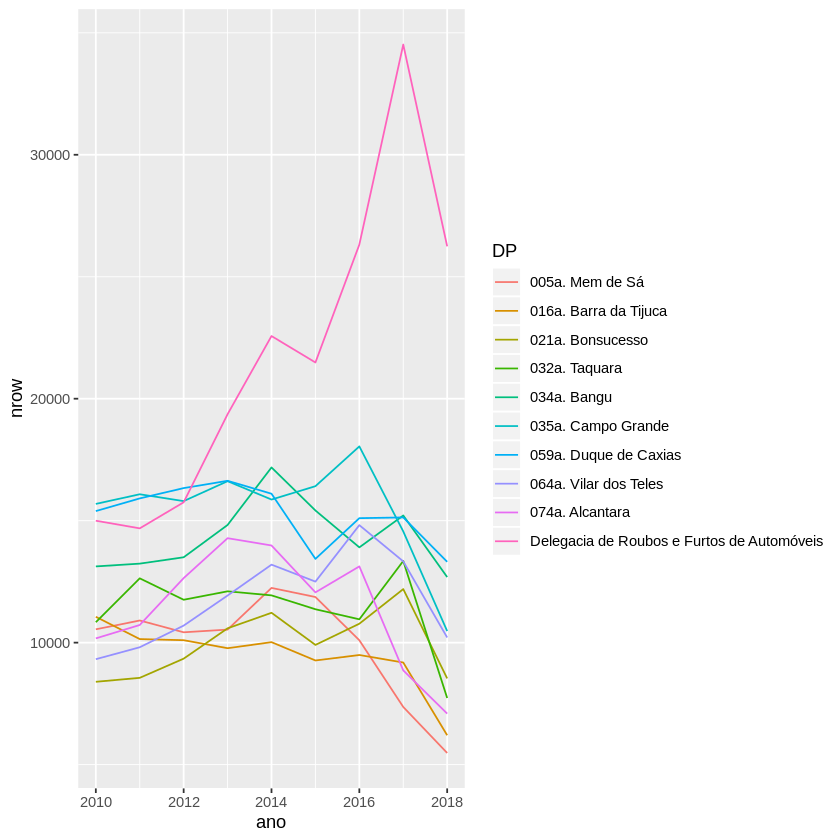

In [29]:
df <- df_isp %>%
      filter(DP %in% df.top10.DP$DP)  %>%
      group_by(ano, DP) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(DP,desc(ano))

df$DP <- factor(df$DP)

# Let's draw
ggplot() + geom_line(data = df, aes(x = ano, y = nrow, color = DP))

In [30]:
df <- df_isp %>%
      group_by(titulo_do) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(desc(nrow))
df.top10.titulo_do <- head(df,10)

df.top10.titulo_do$titulo_do

[1] Lesão corporal dolosa              Ameaça                            
 [3] Roubo a transeunte                 Lesão corporal culposa de trânsito
 [5] Furto (outros)                     Roubo de veículo                  
 [7] Estelionato                        Furto a transeunte                
 [9] Recuperação de veículo             Apreensão de drogas               
71 Levels: Ameaça Apreensão de drogas ... Roubo de bicicleta

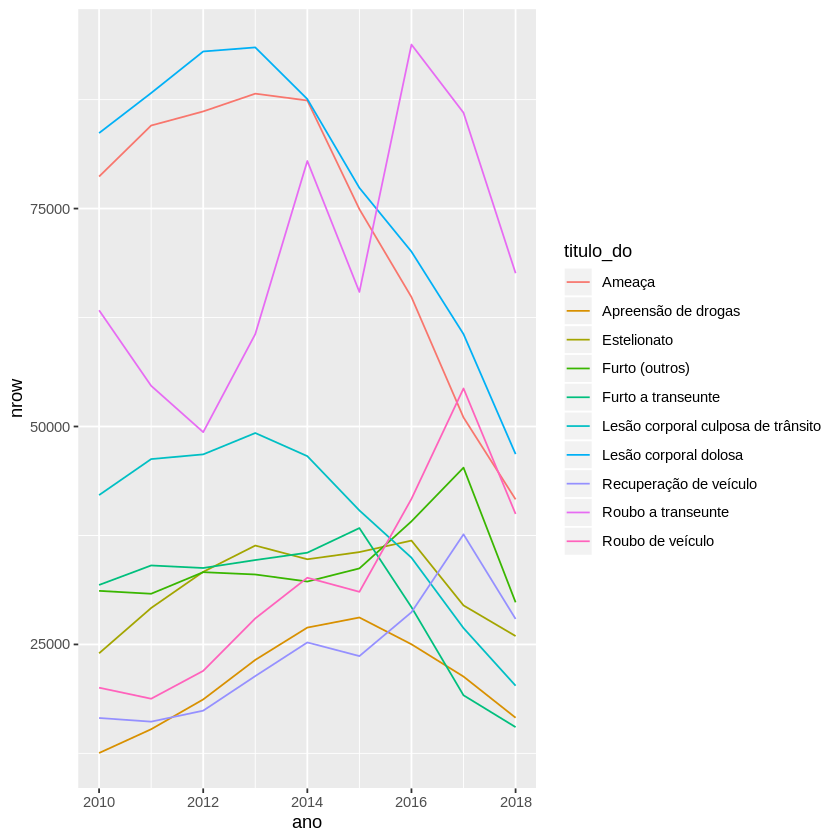

In [31]:
df <- df_isp %>%
      filter(titulo_do %in% df.top10.titulo_do$titulo_do)  %>%
      group_by(ano, titulo_do) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(titulo_do,desc(ano))

df$titulo_do <- factor(df$titulo_do)

# Let's draw
ggplot() + geom_line(data = df, aes(x = ano, y = nrow, color = titulo_do))